<a href="https://colab.research.google.com/github/Allanoor95/ds2-2020/blob/master/PROJECT_6_C%C3%A9cile_Gaillard_(IUEM)_%26%26_NOOR_Alla_(IMT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projects 6: Ocean warming contribution to Sea level rise**


**Description:** Sea level increases because of changes in currents (dynamic effect) and because of ocean density changes (steric effect). 

we will Compute in this project ocean density changes contribution to Sea level rises (thermosteric effect) and demonstrate that it is the driver of regional sea level change trends.

**Data:** we used the EN4 dataset that is an interpolation of all available ocean observations (of temperature and salinity) onto a regular space/time grid.

**STUDENTS:**  Cécile Gaillard (IUEM) && NOOR Alla (IMT)

**Reference :**

https://github.com/TEOS-10/python-gsw/

https://teos-10.github.io/GSW-Python/density.html

https://teos-10.github.io/GSW-Python/geostrophy.html





In [0]:
%%bash
apt-get install libgeos-3* libgeos-dev
pip install https://github.com/matplotlib/basemap/archive/master.zip
# Some pip we need to install before we start out project !

Reading package lists...
Building dependency tree...
Reading state information...
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-3.6.2 set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (1,115 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing

In [0]:

!pip install gcsfs
!pip install xarray
!pip install zarr
!pip install dask_ml
!pip install dask distributed
!pip install gsw
!apt-get -qq install python-cartopy python3-cartopy

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (100,95)
%matplotlib inline 
from matplotlib.pyplot import *



     |████████████████████████████████| 3.3MB 9.1MB/s 
     |████████████████████████████████| 3.8MB 41.9MB/s 
  Created wheel for zarr: filename=zarr-2.4.0-cp36-none-any.whl size=127068 sha256=cebc638749016c460ce47e3de0c3998c0eb4621352a319308707b6ae7a2b72b1
  Stored in directory: /root/.cache/pip/wheels/e1/5b/25/24c685604b91139aba00a5b6299b53e7a0661f737f27782559
  Created wheel for asciitree: filename=asciitree-0.3.3-cp36-none-any.whl size=5036 sha256=5530b6989400472bb3010a8a4d4d4dcd9f5b934d347dc03e1f5622d5d96364a8
  Stored in directory: /root/.cache/pip/wheels/1d/d9/58/9808b306744df0208fccc640d3d9952a5bc7468502d42897d5
  Created wheel for numcodecs: filename=numcodecs-0.6.4-cp36-cp36m-linux_x86_64.whl size=3882617 sha256=c9fec9769bd066a1b90c6a8661108cfa43ae095c8cec57f90a7a4e06d13d948c
  Stored in directory: /root/.cache/pip/wheels/ca/07/ed/fea2e120cbb91d90b577c5ac56b4b082024f56fcd88e9afa55
Successfully built zarr asciitree numcodecs
     |████████████████████████████████| 133kB 9.0MB

     |████████████████████████████████| 2.4MB 7.3MB/s 
  Created wheel for gsw: filename=gsw-3.3.1-cp36-cp36m-linux_x86_64.whl size=2008382 sha256=adde55e45cabaa4905a76c6b9e0df9a1ec0d3f464458ee2e5e77edfa4b2c293c
  Stored in directory: /root/.cache/pip/wheels/34/a5/7d/a8398b76644ed482744a2c4af2f0869c20a15a3682c8d37ab6
Successfully built gsw
Selecting previously unselected package python-pkg-resources.
(Reading database ... 135020 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11

## Import and set-up

In [0]:

import numpy as np
import cartopy.crs as crs
import xarray as xr
import gcsfs
import warnings
import gsw
warnings.filterwarnings("ignore") # disable warnings


### Connection to the GCP: 


In [0]:
#Load data to analyse and have some idea about the metadata
from google.cloud import storage
fs = gcsfs.GCSFileSystem(project="alert-ground-261008")
gcsmap = fs.get_mapper("opendata_bdo2020/EN.4.2.1.f.analysis.g10.zarr")
ds = xr.open_zarr(gcsmap)  


### DATA UNDERSTANDING

In [0]:
ds

<xarray.Dataset>
Dimensions:                          (bnds: 2, depth: 42, lat: 173, lon: 360, time: 832)
Coordinates:
  * depth                            (depth) float32 5.0215898 ... 5350.272
  * lat                              (lat) float32 -83.0 -82.0 ... 88.0 89.0
  * lon                              (lon) float32 1.0 2.0 3.0 ... 359.0 360.0
  * time                             (time) datetime64[ns] 1950-01-16T12:00:00 ... 2019-04-16
Dimensions without coordinates: bnds
Data variables:
    depth_bnds                       (time, depth, bnds) float32 dask.array<chunksize=(1, 42, 2), meta=np.ndarray>
    salinity                         (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_observation_weights     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_uncertainty             (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature                      (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_observation_weights  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_uncertainty          (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(832, 2), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.0
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    GDS_version_id:         v1.7
    contact:                Simon Good - simon.good@metoffice.gov.uk
    creation_date:          2017-04-21 21:12:08.123 -00:00
    easternmost_longitude:  362.5
    file_quality_index:     0
    grid_resolution:           1.00000 degree
    history:                
    institution:            UK Met Office
    netcdf_version_id:      3.5
    northernmost_latitude:  89.5
    product_version:        1.0
    references:             None
    southernmost_latitude:  -90.5
    start_date:             2001-01-01 UTC
    start_time:             00:00:00 UTC
    stop_date:              2001-01-01 UTC
    stop_time:              00:00:00 UTC
    title:                  Temperature and salinity analysis
    westernmost_longitude:  0.5

In [0]:
# to get more information about our Attributes, example units,value max ,min and extra
for v in ds.data_vars:
    print('{:>10}: {}'.format(v, ds[v].attrs))

depth_bnds: {}
  salinity: {'long_name': 'salinity', 'standard_name': 'sea_water_salinity', 'units': 'psu', 'valid_max': 48.0, 'valid_min': -5.0}
salinity_observation_weights: {'comment': 'The total weighting given to the observation increments when forming the analysis', 'long_name': 'salinity observation weights'}
salinity_uncertainty: {'long_name': 'salinity error standard deviation', 'units': '1'}
temperature: {'long_name': 'temperature', 'standard_name': 'sea_water_potential_temperature', 'units': 'kelvin', 'valid_max': 45.0, 'valid_min': -5.0}
temperature_observation_weights: {'comment': 'The total weighting given to the observation increments when forming the analysis', 'long_name': 'temperature observation weights'}
temperature_uncertainty: {'long_name': 'temperature error standard deviation', 'units': 'kelvin'}
 time_bnds: {}


### DATA PREPARATION FOR 'Trend steric height (mm/year) (1993 - 2010)'


In [0]:
# we group all our data to years
dx = ds.groupby('time.year').mean(dim = 'time')
# data selection (filtre) inorder to work just with years between 1993 - 2019
df0 = dx.where(dx.year > 1992  , drop=True)
df = df0.where(df0.year < 2011  , drop=True)
df

<xarray.Dataset>
Dimensions:                          (bnds: 2, depth: 42, lat: 173, lon: 360, year: 18)
Coordinates:
  * lon                              (lon) float32 1.0 2.0 3.0 ... 359.0 360.0
  * depth                            (depth) float32 5.0215898 ... 5350.272
  * lat                              (lat) float32 -83.0 -82.0 ... 88.0 89.0
  * year                             (year) int64 1993 1994 1995 ... 2009 2010
Dimensions without coordinates: bnds
Data variables:
    depth_bnds                       (year, depth, bnds) float32 dask.array<chunksize=(1, 42, 2), meta=np.ndarray>
    salinity                         (year, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_observation_weights     (year, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_uncertainty             (year, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature                      (year, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_observation_weights  (year, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_uncertainty          (year, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>

In [0]:
# Scaling the axes up to 2D arrays
t,z, LAT , LON= np.meshgrid(df.year,df.depth, df.lat,df.lon,indexing='ij') 
# Pressure from height (SW uses depth, not height)
p = gsw.p_from_z(-z,LAT)
#plt.pcolormesh(df.lon,df.lat,p[0,0,:,:])
# Absolute Salinity
SA = gsw.SA_from_SP(df.salinity,p,LON,LAT)
#plt.pcolormesh(df.lon,df.lat,SA[0,0,:,:])
#plt.colorbar()
#plot_im(df.lon,df.lat,SA[0,0,:,:],50,'SA')
#SA.shape
#Conservative Temperature
PT = df['temperature'] -273.15
CT = gsw.CT_from_pt(SA,PT)
#plt.pcolormesh(df.lon,df.lat,CT[0,0,:,:])
#plt.colorbar()
Geostrophy = gsw.geo_strf_dyn_height(SA, CT, p, p_ref=0, axis=1, max_dp=5000, interp_method='pchip')
#plt.pcolormesh(df.lon,df.lat, Geostrophy[0,0,:,:])
#plt.colorbar()
steric_height = Geostrophy / 9.8 # m


In [0]:
 steric_height.shape

(18, 42, 173, 360)

In [0]:
# here we would like to have idea about depth or pressure value and we look for value which is close to 1*10^3
df.depth.values

array([5.02158976e+00, 1.50785398e+01, 2.51604595e+01, 3.52782898e+01,
       4.54477615e+01, 5.56914940e+01, 6.60419846e+01, 7.65459137e+01,
       8.72702866e+01, 9.83111801e+01, 1.09806175e+02, 1.21951897e+02,
       1.35028549e+02, 1.49433731e+02, 1.65728455e+02, 1.84697464e+02,
       2.07425446e+02, 2.35386169e+02, 2.70534119e+02, 3.15374084e+02,
       3.72965454e+02, 4.46800934e+02, 5.40502197e+02, 6.57322937e+02,
       7.99549622e+02, 9.67995850e+02, 1.16180591e+03, 1.37866101e+03,
       1.61529053e+03, 1.86807068e+03, 2.13351709e+03, 2.40858350e+03,
       2.69078027e+03, 2.97816602e+03, 3.26927808e+03, 3.56304077e+03,
       3.85867627e+03, 4.15562793e+03, 4.45350195e+03, 4.75202100e+03,
       5.05098975e+03, 5.35027197e+03], dtype=float32)

In [0]:
# looking for the position of this value which is close to 1000
np.where(df.depth.values == 9.67995850e+02 ) 

(array([25]),)

In [0]:
 # 3D
 SHA = steric_height[:,25,:,:] #- Geostrophy[:,0,:,:] 
 SHA .shape

(18, 173, 360)

### DATA MODELING


In [0]:
# 2D
# import the LinearRegression method from scikit-learn
from sklearn.linear_model import LinearRegression
SHA = np.reshape(SHA,(18,173*360),order='F')
SHA.shape

(18, 62280)

In [0]:
# here we take all the change of all years
gsum=np.sum(SHA,axis=0)
ix = np.where(gsum == gsum)[0]    # ix is all the values which are not nan 
gsum.shape

(62280,)

In [0]:
# create a generic instance the model
model = LinearRegression()
model.fit(df.year.values[:,None], SHA[:,ix])
y_hat = model.predict(df.year.values[:,None])
y_hat.shape
model.coef_.shape

(38293, 1)

In [0]:
# create empty array and feed that inside 
a = np.zeros(62280)
a[ix] = np.squeeze(model.coef_[:])
a.shape
a = np.reshape(a,(173,360),order='F')
a.shape

(173, 360)

In [0]:
a[a == 0] = 'nan'
T = a * -1000    # to change our data from m/yr to mm/yr
T.shape

(173, 360)

### EVALUATION

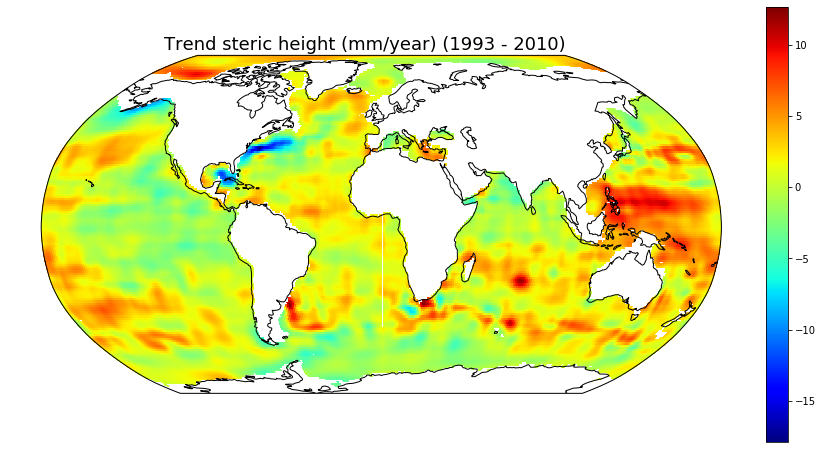

In [0]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

fig= plt.figure()
ax = fig.gca(projection=crs.Robinson())
plt.pcolor(ds.lon,ds.lat,T,cmap='jet', transform=crs.PlateCarree())
plt.title('Trend steric height (mm/year) (1993 - 2010)',size=10, fontsize=18)
plt.xlabel('longitude', size=10, fontsize=13)
plt.ylabel('latitude', size=10, fontsize=13)
ax.coastlines()
plt.colorbar()


## DATA PREPARATION - Influence of the temperature

In [0]:
# we group all our data to years between 1993 and 2017 to compare it with the information we found on internet
dx = ds.groupby('time.year').mean(dim = 'time')
# data selection (filtre) inorder to work just with years between 1993 - 2019
df0 = dx.where(dx.year > 1992  , drop=True)
df = df0.where(df0.year < 2018  , drop=True)
PT = df['temperature'] -273.15
t,z, LAT , LON= np.meshgrid(df.year,df.depth, df.lat,df.lon,indexing='ij') 

In [0]:
# Influence de la temperature
Rho  = 1035
Cp = 4185.5
#result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
dz=np.zeros((25, 41, 173, 360))
dt=np.zeros((25, 41, 173, 360))
dt= np.cumsum(0.5*(PT[:,:-1,:,:]+PT[:,1:,:,:]),axis=1)
dz=np.abs(np.array(z[:,:-2,:,:])-np.array(z[:,2:,:,:]))


Temp= Cp*Rho*dt*dz # Joules 


In [0]:
Temp01 = Temp/(100000*100000) # Temp en J/m²


### Linear regression 

In [0]:
 # 3D
 OHC0 = Temp01[:,25,:,:] 
 OHC0 .shape

(25, 173, 360)

In [0]:
# 2D
# import the LinearRegression method from scikit-learn
from sklearn.linear_model import LinearRegression
OHC = np.reshape(OHC0.values,(25,173*360),order='F')
OHC.shape
5.021590e+00


5.02159

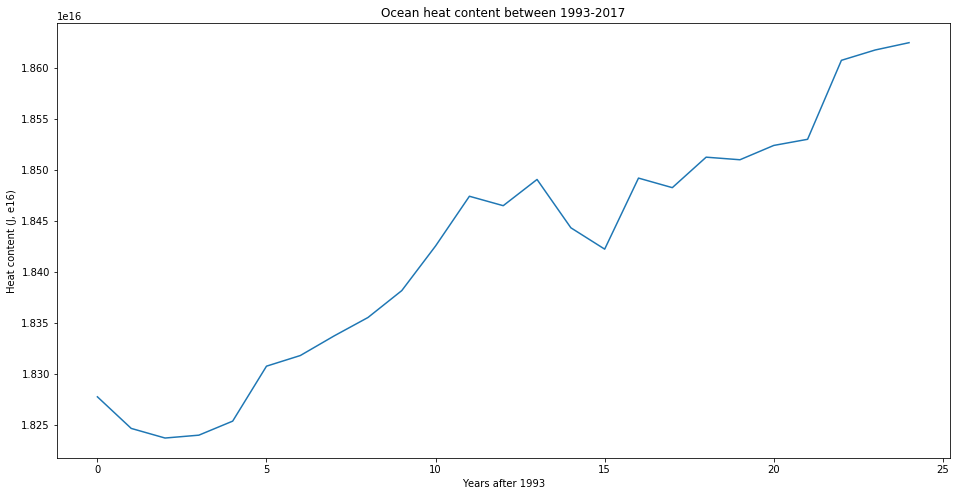

In [0]:
plot(np.nansum(OHC*100e3*100e3,axis=1))
plt.title('Ocean heat content between 1993-2017')
plt.xlabel('Years after 1993')
plt.ylabel ('Heat content (J, e16)')
plt.show()

In [0]:
# here we take all the change of all years
gsum=np.sum(OHC,axis=0)
iy = np.where(gsum == gsum)[0]    # iy is all the values which are not nan 
gsum.shape
# create a generic instance the model
model = LinearRegression()
model.fit(df.year.values[:,None], OHC[:,iy])
y_hat = model.predict(df.year.values[:,None])
y_hat.shape
#OHC[:,iy]= y_hat
model.coef_.shape
# create empty array and feed that inside 
a = np.zeros(62280)
a[iy] = np.squeeze(model.coef_[:])
a.shape



(62280,)

In [0]:
a = np.reshape(a,(173,360),order='F')
a.shape

(173, 360)

In [0]:
a[a == 0] = np.nan
T2 = a   # to change our data from J/yr to mm/yr
T2.shape

(173, 360)

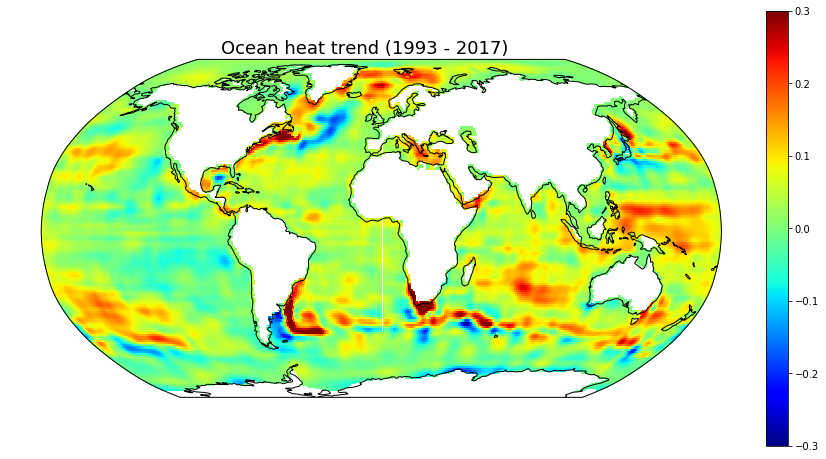

In [0]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

fig= plt.figure()
ax=fig.gca(projection=crs.Robinson())
plt.xlabel('longitude', size=10, fontsize=13)
plt.ylabel('latitude', size=10, fontsize=13)
plt.pcolor(ds.lon,ds.lat,T2, cmap='jet', transform=crs.PlateCarree())
plt.clim ([-0.3,0.3])
plt.colorbar()
plt.title('Ocean heat trend (1993 - 2017)',size=10, fontsize=18)

ax.coastlines()